# Nbeats - before doing last 48

in some cases doing just last 48 would give an error relating to model not having enough values to work with, so instead did the usual train/test/validation for checking the general performance and did the last 48 hour when creating the forecast combinations

C:\Users\elshe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsforecast\core.py:26: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
C:\Users\elshe\AppData\Local\Temp\ipykernel_25172\3838840772.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_train = pd.read_csv("Hourly_wdates.csv", parse_dates=True, index_col=0)
C:\Users\elshe\AppData\Local\Temp\ipykernel_25172\3838840772.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_test = pd.read_csv("Hourly-test.csv", parse_dates=True, index_col=0)
GPU a

Epoch 29: 100%|██████████| 24/24 [00:00<00:00, 44.61it/s, train_loss=0.195, val_loss=0.323]

`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 29: 100%|██████████| 24/24 [00:00<00:00, 44.42it/s, train_loss=0.195, val_loss=0.323]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 73.92it/s]


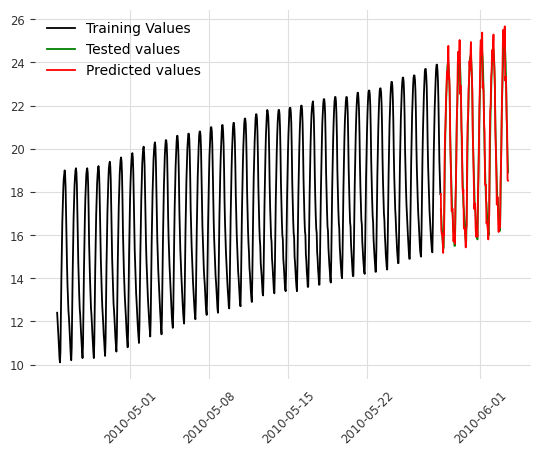

Metric                                            Value
------------------------------------------------  ------------------
Symmetric mean absolute percentage error (sMAPE)  2.31 %
Mean Absolute Scaled Error (MASE)                 2.97
R2 Score                                          0.9624417037669004


In [1]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import numpy as np
from darts import TimeSeries
from darts.models import NBEATSModel
from darts.metrics import r2_score
from error_metrics import smape, mase 

df_train = pd.read_csv("Hourly_wdates.csv", parse_dates=True, index_col=0)
df_test = pd.read_csv("Hourly-test.csv", parse_dates=True, index_col=0)

n = 257

df = df_train.iloc[n - 1, 2:].dropna()
df = df[df > 0]
df = pd.to_numeric(df, errors='coerce')

initial_date = df_train.iloc[n - 1, 0]
index = pd.date_range(start=initial_date, periods=len(df), freq='H')
df.index = index

tested = df_test.iloc[n - 1, :].dropna()
tested = tested[tested > 0]
tested = pd.to_numeric(tested, errors='coerce')

last_date_train = df.index[-1]
index_test = pd.date_range(start=last_date_train, periods=len(tested), freq='H')
tested.index = index_test

train_series = TimeSeries.from_series(df)

split_index = int(len(train_series) * 0.85)  
train_series, val_series = train_series[:split_index], train_series[split_index:]

model = NBEATSModel(
    input_chunk_length=24,
    output_chunk_length=48,
    n_epochs=30,
    num_stacks=2,
    num_blocks=3,
    num_layers=4,
    layer_widths=512,
    batch_size=32,
    random_state=42
)

model.fit(train_series, val_series=val_series)

forecast = model.predict(n=len(val_series))
actual_data = val_series.values().flatten()
predicted_data = forecast.values().flatten()

plt.plot(df.index[:-len(val_series)], df[:-len(val_series)], label='Training Values')
plt.plot(df.index[-len(val_series):], actual_data, color='green', label="Tested values")
plt.plot(df.index[-len(val_series):], predicted_data, color='red', label="Predicted values")
plt.xticks(rotation=45)
plt.legend()
plt.show()

smape_value = round(smape(actual_data, predicted_data), 2)
mase_value = round(mase(df.values, actual_data, predicted_data, 24), 2)

actual_series = TimeSeries.from_series(pd.Series(actual_data, index=val_series.time_index))
predicted_series = TimeSeries.from_series(pd.Series(predicted_data, index=val_series.time_index))

r2 = r2_score(actual_series, predicted_series)

table = [["Symmetric mean absolute percentage error (sMAPE)", f"{smape_value} %"],
         ["Mean Absolute Scaled Error (MASE)", mase_value],
         ["R2 Score", r2]]

print(tabulate(table, headers=["Metric", "Value"], tablefmt="simple"))


# LSTM

LSTM is not contained in Darts so had to use keras  tensorflow


Epoch 1/30


C:\Users\elshe\AppData\Local\Temp\ipykernel_25172\1923670644.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_train = pd.read_csv("Hourly_wdates.csv", parse_dates=True, index_col=0)
C:\Users\elshe\AppData\Local\Temp\ipykernel_25172\1923670644.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_test = pd.read_csv("Hourly-test.csv", parse_dates=True, index_col=0)


27/27 [==============================] - 1s 11ms/step - loss: 41.7931 - val_loss: 2.3963
Epoch 2/30
27/27 [==============================] - 0s 8ms/step - loss: 0.9572 - val_loss: 0.2770
Epoch 3/30
27/27 [==============================] - 0s 7ms/step - loss: 0.2303 - val_loss: 0.2017
Epoch 4/30
27/27 [==============================] - 0s 6ms/step - loss: 0.1496 - val_loss: 0.1249
Epoch 5/30
27/27 [==============================] - 0s 6ms/step - loss: 0.1185 - val_loss: 0.1569
Epoch 6/30
27/27 [==============================] - 0s 6ms/step - loss: 0.1197 - val_loss: 0.4714
Epoch 7/30
27/27 [==============================] - 0s 6ms/step - loss: 0.1670 - val_loss: 0.2519
Epoch 8/30
27/27 [==============================] - 0s 6ms/step - loss: 0.0782 - val_loss: 0.4908
Epoch 9/30
27/27 [==============================] - 0s 6ms/step - loss: 0.1711 - val_loss: 0.3077
Epoch 10/30
27/27 [==============================] - 0s 6ms/step - loss: 0.0644 - val_loss: 0.1101
Epoch 11/30
27/27 [=========

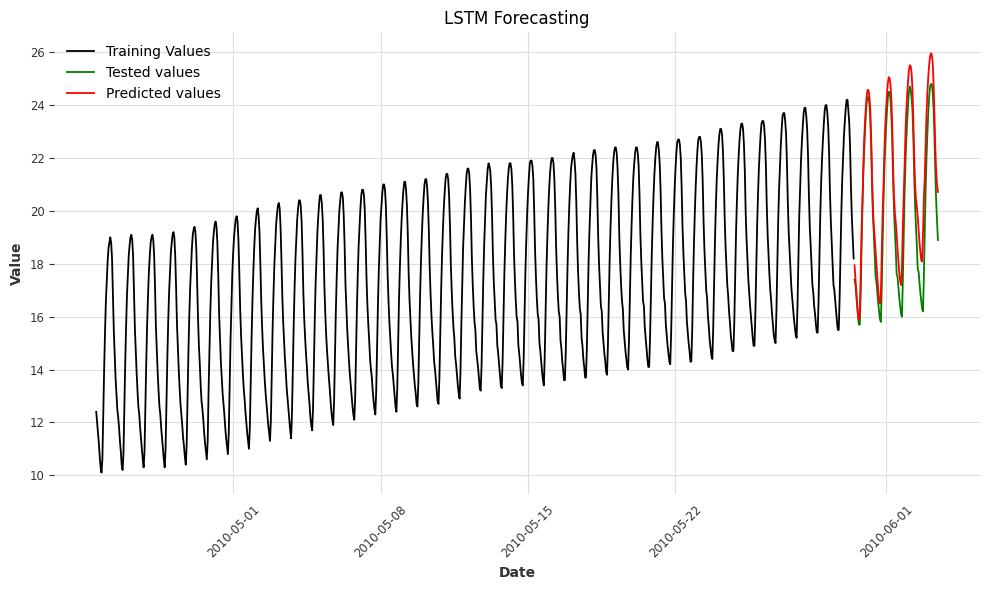

R2 Score: 0.8788741672164384
Metric                                            Value
------------------------------------------------  ------------------
Symmetric mean absolute percentage error (sMAPE)  100 %
Mean Absolute Scaled Error (MASE)                 2261.03
R2 Score                                          0.8788741672164384


In [7]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import r2_score

df_train = pd.read_csv("Hourly_wdates.csv", parse_dates=True, index_col=0)
df_test = pd.read_csv("Hourly-test.csv", parse_dates=True, index_col=0)

n = 257

df = df_train.iloc[n - 1, 2:].dropna()
df = df[df > 0]
df = pd.to_numeric(df, errors='coerce')

initial_date = df_train.iloc[n - 1, 0]
index = pd.date_range(start=initial_date, periods=len(df), freq='H')
df.index = index

tested = df_test.iloc[n - 1, :].dropna()
tested = tested[tested > 0]
tested = pd.to_numeric(tested, errors='coerce')

last_date_train = df.index[-1]
index_test = pd.date_range(start=last_date_train, periods=len(tested), freq='H')
tested.index = index_test

split_index = int(len(df) * 0.90)  
train_data = df.iloc[:split_index]
val_data = df.iloc[split_index:]


def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 24  
X_train, y_train = create_sequences(train_data.values, seq_length)
X_val, y_val = create_sequences(val_data.values, seq_length)

model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val), verbose=1)

forecast = []
current_batch = train_data.iloc[-seq_length:].values.reshape((1, seq_length, 1))

for i in range(len(val_data)):
    current_pred = model.predict(current_batch)[0]
    forecast.append(current_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

forecast = np.array(forecast).flatten()
actual_data = val_data.values.flatten()

plt.figure(figsize=(10, 6))
plt.plot(df.index[:-len(val_data)], df.iloc[:-len(val_data)], label='Training Values')
plt.plot(df.index[-len(val_data):], val_data, color='green', label="Tested values")
plt.plot(df.index[-len(val_data):], forecast, color='red', label="Predicted values")
plt.xticks(rotation=45)
plt.legend()
plt.title('LSTM Forecasting')
plt.xlabel('Date')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

r2 = r2_score(actual_data, forecast)

print(f"R2 Score: {r2}")

table = [["Symmetric mean absolute percentage error (sMAPE)", f"{smape_value} %"],
         ["Mean Absolute Scaled Error (MASE)", mase_value],
         ["R2 Score", r2]]

print(tabulate(table, headers=["Metric", "Value"], tablefmt="simple"))


# Time GPT

C:\Users\elshe\AppData\Local\Temp\ipykernel_15160\3061704917.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_train = pd.read_csv("Hourly_wdates.csv", parse_dates=True, index_col=0)
C:\Users\elshe\AppData\Local\Temp\ipykernel_15160\3061704917.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_test = pd.read_csv("Hourly-test.csv", parse_dates=True, index_col=0)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                | Type                | Params
------------------------------------------------------------
0 | criterion           | MSELoss 

Epoch 14: 100%|██████████| 28/28 [00:00<00:00, 35.82it/s, train_loss=15.50, val_loss=18.20]

`Trainer.fit` stopped: `max_epochs=15` reached.


Epoch 14: 100%|██████████| 28/28 [00:00<00:00, 35.77it/s, train_loss=15.50, val_loss=18.20]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 71.43it/s]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                | Type                | Params
------------------------------------------------------------
0 | criterion           | MSELoss             | 0     
1 | train_metrics       | MetricCollection    | 0     
2 | val_metrics         | MetricCollection    | 0     
3 | encoder             | Linear              | 128   
4 | positional_encoding | _PositionalEncoding | 0     
5 | transformer         | Transformer         | 548 K 
6 | decoder             | Linear              | 1.6 K 
------------------------------------------------------------
550 K     Trainable params
0         Non-trainable params
550 K     Total params
2.201     Total estimated model params size (MB)


Epoch 14: 100%|██████████| 29/29 [00:00<00:00, 37.50it/s, train_loss=12.40]

`Trainer.fit` stopped: `max_epochs=15` reached.


Epoch 14: 100%|██████████| 29/29 [00:00<00:00, 37.45it/s, train_loss=12.40]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 60.06it/s]


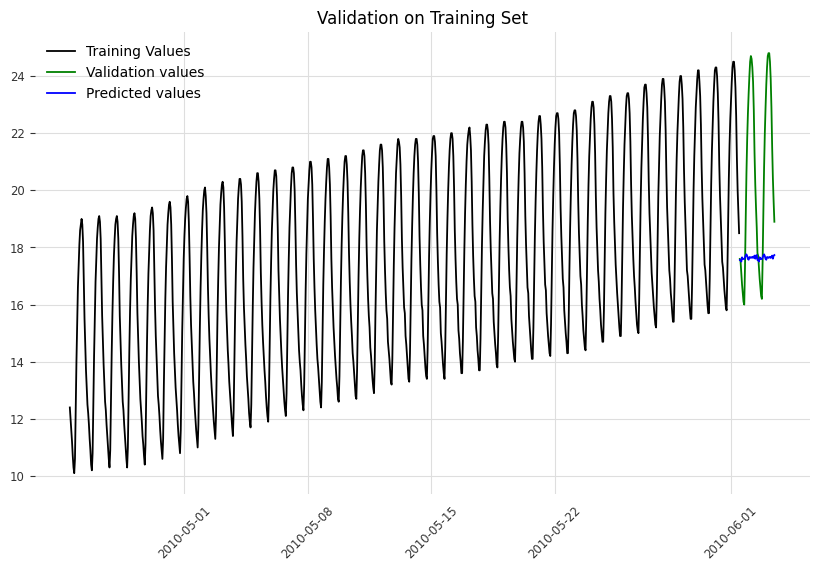

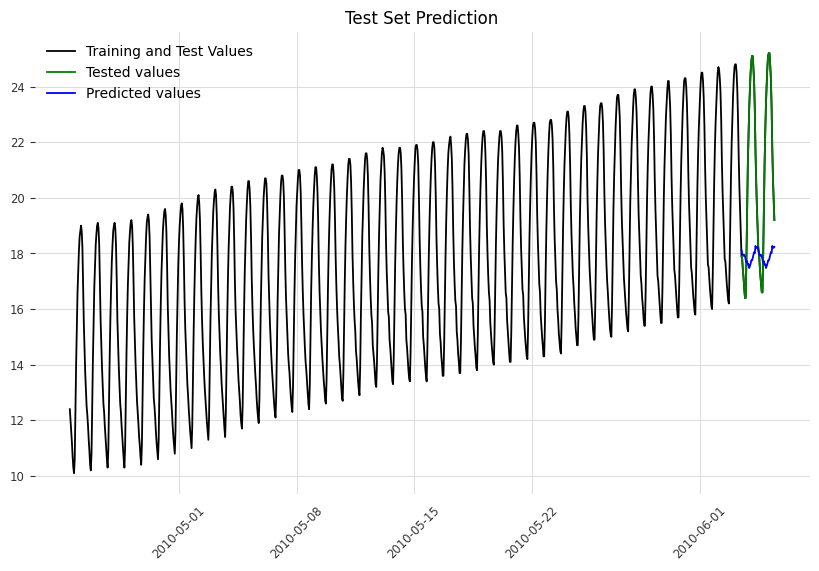

Validation on Train Set:
Metric                                            Value
------------------------------------------------  -------------------
Symmetric mean absolute percentage error (sMAPE)  16.61 %
Mean Absolute Scaled Error (MASE)                 21.56
R2 Score                                          -0.8795279494809853
Test Set Prediction:
Metric                                            Value
------------------------------------------------  -------------------
Symmetric mean absolute percentage error (sMAPE)  16.98 %
Mean Absolute Scaled Error (MASE)                 22.38
R2 Score                                          -1.0043926202009246


In [11]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import TransformerModel
from darts.metrics import r2_score
from error_metrics import smape, mase  

df_train = pd.read_csv("Hourly_wdates.csv", parse_dates=True, index_col=0)
df_test = pd.read_csv("Hourly-test.csv", parse_dates=True, index_col=0)


n = 257

df = df_train.iloc[n - 1, 2:].dropna()
df = df[df > 0].astype(float)
initial_date = df_train.iloc[n - 1, 0]
df.index = pd.date_range(start=initial_date, periods=len(df), freq='H')

tested = df_test.iloc[n - 1, :].dropna()
tested = tested[tested > 0].astype(float)
last_date_train = df.index[-1]
index_test = pd.date_range(start=last_date_train + pd.Timedelta(hours=1), periods=len(tested), freq='H')
tested.index = index_test

validation_size = 48
train_series = df.iloc[:-validation_size]
val_series = df.iloc[-validation_size:]

train_series_ts = TimeSeries.from_series(train_series)
val_series_ts = TimeSeries.from_series(val_series)
test_series_ts = TimeSeries.from_series(tested)

transformer_model = TransformerModel(
    input_chunk_length=24,
    output_chunk_length=24,
    n_epochs=15,
    d_model=64,
    nhead=4,
    num_encoder_layers=3,
    num_decoder_layers=3,
    dropout=0.1,
    activation="relu",
    batch_size=32,
    random_state=42
)

transformer_model.fit(train_series_ts, val_series=val_series_ts)

forecast_transformer_train = transformer_model.predict(n=validation_size).values().flatten()
actual_data_transformer_train = val_series.values.flatten()

series_with_val = TimeSeries.from_series(pd.concat([train_series, val_series]))
transformer_model.fit(series_with_val)
forecast_transformer = transformer_model.predict(n=len(tested)).values().flatten()

smape_value_train = round(smape(actual_data_transformer_train, forecast_transformer_train), 2)
mase_value_train = round(mase(df.values, actual_data_transformer_train, forecast_transformer_train, 24), 2)
r2_train = r2_score(
    TimeSeries.from_series(pd.Series(actual_data_transformer_train, index=val_series_ts.time_index)),
    TimeSeries.from_series(pd.Series(forecast_transformer_train, index=val_series_ts.time_index))
)

smape_value = round(smape(tested.values, forecast_transformer), 2)
mase_value = round(mase(df.values, tested.values, forecast_transformer, 24), 2)
r2 = r2_score(
    TimeSeries.from_series(pd.Series(tested.values, index=test_series_ts.time_index)),
    TimeSeries.from_series(pd.Series(forecast_transformer, index=test_series_ts.time_index))
)

plt.figure(figsize=(10, 6))
plt.plot(df.index[:-validation_size], df.values[:-validation_size], label='Training Values')
plt.plot(df.index[-validation_size:], actual_data_transformer_train, color='green', label="Validation values")
plt.plot(df.index[-validation_size:], forecast_transformer_train, color='blue', label="Predicted values")
plt.xticks(rotation=45)
plt.legend()
plt.title("Validation on Training Set")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(pd.concat([df, tested]).index, pd.concat([df, tested]), label='Training and Test Values')
plt.plot(tested.index, tested.values, color='green', label="Tested values")
plt.plot(tested.index, forecast_transformer, color='blue', label="Predicted values")
plt.xticks(rotation=45)
plt.legend()
plt.title("Test Set Prediction")
plt.show()

table_train = [["Symmetric mean absolute percentage error (sMAPE)", f"{smape_value_train} %"],
               ["Mean Absolute Scaled Error (MASE)", mase_value_train],
               ["R2 Score", r2_train]]

print("Validation on Train Set:")
print(tabulate(table_train, headers=["Metric", "Value"], tablefmt="simple"))

table_test = [["Symmetric mean absolute percentage error (sMAPE)", f"{smape_value} %"],
              ["Mean Absolute Scaled Error (MASE)", mase_value],
              ["R2 Score", r2]]

print("Test Set Prediction:")
print(tabulate(table_test, headers=["Metric", "Value"], tablefmt="simple"))


# GRU

There was a problem with darts, so had to use keras

Epoch 1/30


C:\Users\elshe\AppData\Local\Temp\ipykernel_15160\276305529.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_train = pd.read_csv("Hourly_wdates.csv", parse_dates=True, index_col=0)
C:\Users\elshe\AppData\Local\Temp\ipykernel_15160\276305529.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_test = pd.read_csv("Hourly-test.csv", parse_dates=True, index_col=0)


27/27 [==============================] - 1s 13ms/step - loss: 232.4266 - val_loss: 126.5394
Epoch 2/30
27/27 [==============================] - 0s 7ms/step - loss: 22.4764 - val_loss: 9.2050
Epoch 3/30
27/27 [==============================] - 0s 7ms/step - loss: 3.7087 - val_loss: 3.6513
Epoch 4/30
27/27 [==============================] - 0s 6ms/step - loss: 2.5816 - val_loss: 2.3861
Epoch 5/30
27/27 [==============================] - 0s 7ms/step - loss: 2.2639 - val_loss: 2.2893
Epoch 6/30
27/27 [==============================] - 0s 7ms/step - loss: 2.0022 - val_loss: 1.9493
Epoch 7/30
27/27 [==============================] - 0s 7ms/step - loss: 1.7161 - val_loss: 1.5398
Epoch 8/30
27/27 [==============================] - 0s 6ms/step - loss: 1.3880 - val_loss: 1.7321
Epoch 9/30
27/27 [==============================] - 0s 6ms/step - loss: 0.9548 - val_loss: 0.4931
Epoch 10/30
27/27 [==============================] - 0s 6ms/step - loss: 0.4839 - val_loss: 0.2718
Epoch 11/30
27/27 [=====

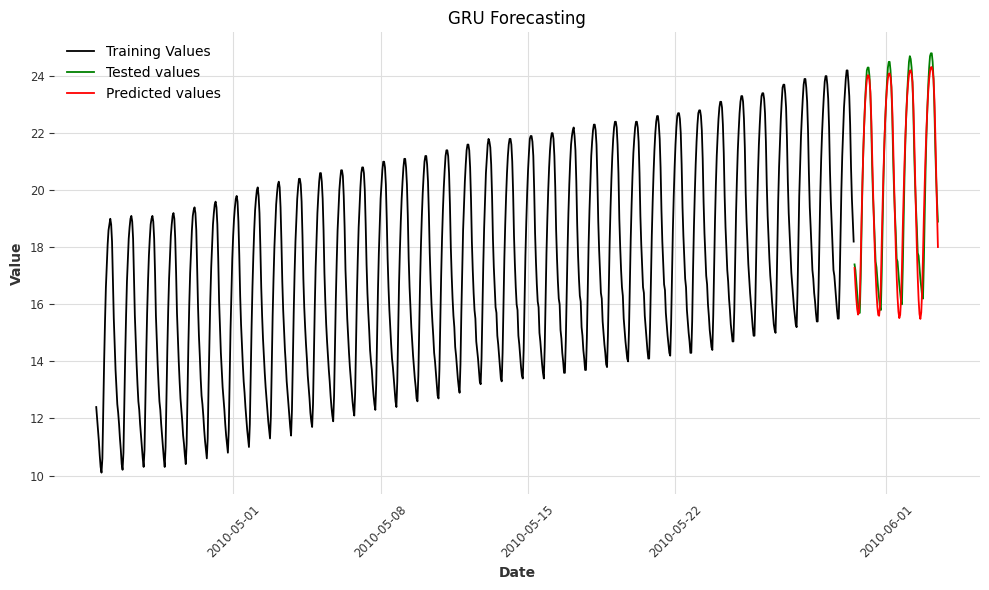

R2 Score: 0.9568527306618382
Metric                                            Value
------------------------------------------------  ------------------
Symmetric mean absolute percentage error (sMAPE)  28.54 %
Mean Absolute Scaled Error (MASE)                 33.81
R2 Score                                          0.9568527306618382


In [20]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.metrics import r2_score

df_train = pd.read_csv("Hourly_wdates.csv", parse_dates=True, index_col=0)
df_test = pd.read_csv("Hourly-test.csv", parse_dates=True, index_col=0)

n = 257

df = df_train.iloc[n - 1, 2:].dropna()
df = df[df > 0]
df = pd.to_numeric(df, errors='coerce')

initial_date = df_train.iloc[n - 1, 0]
index = pd.date_range(start=initial_date, periods=len(df), freq='H')
df.index = index

tested = df_test.iloc[n - 1, :].dropna()
tested = tested[tested > 0]
tested = pd.to_numeric(tested, errors='coerce')

last_date_train = df.index[-1]
index_test = pd.date_range(start=last_date_train, periods=len(tested), freq='H')
tested.index = index_test

split_index = int(len(df) * 0.90)  
train_data = df.iloc[:split_index]
val_data = df.iloc[split_index:]


def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 24  
X_train, y_train = create_sequences(train_data.values, seq_length)
X_val, y_val = create_sequences(val_data.values, seq_length)

model = Sequential([
    GRU(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val), verbose=1)

forecast = []
current_batch = train_data.iloc[-seq_length:].values.reshape((1, seq_length, 1))

for i in range(len(val_data)):
    current_pred = model.predict(current_batch)[0]
    forecast.append(current_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

forecast = np.array(forecast).flatten()
actual_data = val_data.values.flatten()

plt.figure(figsize=(10, 6))
plt.plot(df.index[:-len(val_data)], df.iloc[:-len(val_data)], label='Training Values')
plt.plot(df.index[-len(val_data):], val_data, color='green', label="Tested values")
plt.plot(df.index[-len(val_data):], forecast, color='red', label="Predicted values")
plt.xticks(rotation=45)
plt.legend()
plt.title('GRU Forecasting')
plt.xlabel('Date')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

r2 = r2_score(actual_data, forecast)

print(f"R2 Score: {r2}")

table = [["Symmetric mean absolute percentage error (sMAPE)", f"{smape_value} %"],
         ["Mean Absolute Scaled Error (MASE)", mase_value],
         ["R2 Score", r2]]

print(tabulate(table, headers=["Metric", "Value"], tablefmt="simple"))
